In [68]:
# Import appropriate libraries for preprocessing and exploratory data analysis
import pandas as pd
import numpy as np

import re # regex

# plotting
import matplotlib.pyplot as plt


In [69]:
# read in data
orders = pd.read_csv(filepath_or_buffer='./data/Orders.csv')
returns = pd.read_csv(filepath_or_buffer='./data/Returns.csv')

## Preprocessing and EDA
### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 


In [70]:

orders['Profit'].dtype
print(orders['Profit'][0:10])

orders['Sales'].dtype
print(orders['Sales'][0:10])


# Create a regular expression compiler
non_decimal = re.compile(r'[^\d\-.]')

# Substitute everything except negative sign, decimal point, and numbers
# Using a list comprehension
converted_profit = [non_decimal.sub('', money) for money in orders['Profit']]
converted_sales = [non_decimal.sub('', money) for money in orders['Sales']]


orders['Profit'] = pd.Series(pd.to_numeric(converted_profit))
orders['Sales'] = pd.Series(pd.to_numeric(converted_sales))

# Check
print(orders['Profit'].head())
print(orders['Sales'].head())

1    -$288.77
2     $919.97
3     -$96.54
4     $311.52
5     $763.28
6     $564.84
7     $996.48
8      $54.71
9       $5.48
Name: Profit, dtype: object
1    $3,709.40
2    $5,175.17
3    $2,892.51
4    $2,832.96
5    $2,862.68
6    $1,822.08
7    $5,244.84
8      $341.96
9       $48.71
Name: Sales, dtype: object
0     62.15
1   -288.77
2    919.97
3    -96.54
4    311.52
Name: Profit, dtype: float64
0     221.98
1    3709.40
2    5175.17
3    2892.51
4    2832.96
Name: Sales, dtype: float64


In [73]:
# Check Date column
print(orders['Order.Date'].dtype)
print(orders['Order.Date'][0:10])

# Convert to date object
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

object
0    11/11/14
1      2/5/14
2    10/17/14
3     1/28/14
4     11/5/14
5     6/28/14
6     11/6/12
7     4/14/13
8    11/11/14
9      3/6/12
Name: Order.Date, dtype: object


In [75]:
# Check quantity column
print(orders['Quantity'].dtype) # good, as expected

int64


### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- They want you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- For each order, there is an attribute called `Quantity` that indicates the number of products in the order. 
- If an order contains more than one product, there will be multiple observations of the same order.


In [79]:
# Add 'Week' column indicating week of the year
orders['Week'] = orders['Order.Date'].dt.isocalendar().week


,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Week
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,46
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,6
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,42
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,5
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,45


In [88]:
# Group by order id and week sum quantity

total_quant = orders.groupby(['Week'])['Quantity'].sum().reset_index()



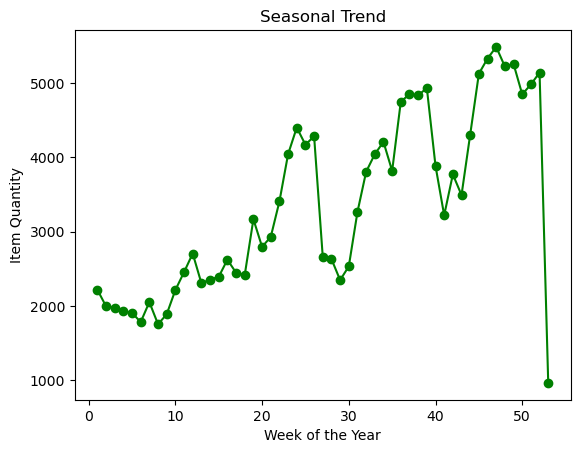

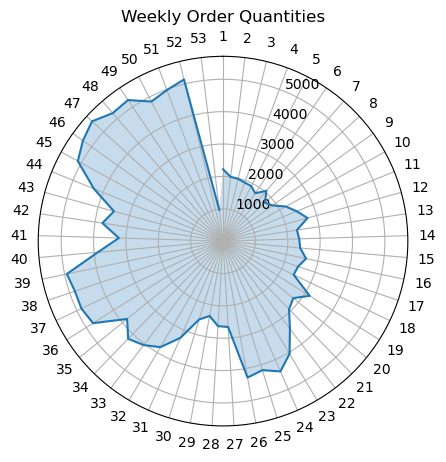

In [96]:


# Plot simple line graph to explore seasonal trend
weeks = total_quant['Week']
quants = total_quant['Quantity']

# Plotting the seasonal trend
plt.plot(weeks, quants, marker='o', linestyle='-', color='g')
plt.xlabel('Week of the Year')
plt.ylabel('Item Quantity')
plt.title('Seasonal Trend')

# Cool, now make it a polar plot
# Convert sales data to radians
theta = np.linspace(0, 2 * np.pi, len(weeks), endpoint=False)
radii = np.array(quants)
width = 2 * np.pi / len(weeks)

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, radii)
ax.fill(theta, radii, alpha=0.25)

# Set tick labels and grid
ax.set_xticks(theta)
ax.set_xticklabels(weeks)
ax.grid(True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)

# Set title
ax.set_title('Weekly Order Quantities')

# Display the plot
plt.show()
